**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [0]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [0]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_datad = train_data.astype('float')
test_datad = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2890 - acc: 0.9132 - val_loss: 0.1296 - val_acc: 0.9576
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0948 - acc: 0.9705 - val_loss: 0.0960 - val_acc: 0.9697
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0578 - acc: 0.9819 - val_loss: 0.0789 - val_acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0393 - acc: 0.9876 - val_loss: 0.0894 - val_acc: 0.9742
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0278 - acc: 0.9913 - val_loss: 0.0638 - val_acc: 0.9819
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0813 - val_acc: 0.9800
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0157 - acc: 0.9949 - val_loss: 0.0827 - val_acc

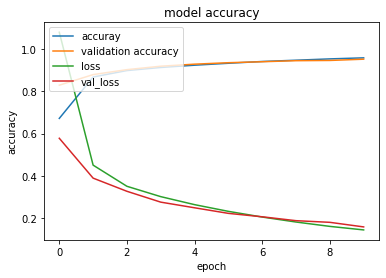

In [0]:

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

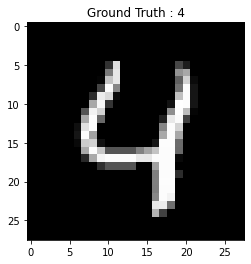

In [0]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [0]:

x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


In [0]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 1.0716 - acc: 0.6128 - val_loss: 0.6899 - val_acc: 0.7495
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.5401 - acc: 0.8326 - val_loss: 0.4670 - val_acc: 0.8614
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.3232 - acc: 0.9057 - val_loss: 0.2748 - val_acc: 0.9177
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.2203 - acc: 0.9344 - val_loss: 0.3079 - val_acc: 0.9072
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1668 - acc: 0.9495 - val_loss: 0.1341 - val_acc: 0.9580
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.1373 - acc: 0.9584 - val_loss: 0.1381 - val_acc: 0.9589
Epoch 7/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1136 - acc: 0.9650 - val_loss: 0.1083 - val_acc

In [0]:

p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_datad, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_datad, test_labels_one_hot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 11.3871 - acc: 0.2928 - val_loss: 10.0620 - val_acc: 0.3755
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.9433 - acc: 0.3828 - val_loss: 9.9259 - val_acc: 0.3840
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.9376 - acc: 0.3833 - val_loss: 9.8853 - val_acc: 0.3866
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.8687 - acc: 0.3876 - val_loss: 9.7809 - val_acc: 0.3931
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.8133 - acc: 0.3911 - val_loss: 9.7637 - val_acc: 0.3941
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.8592 - acc: 0.3882 - val_loss: 9.8498 - val_acc: 0.3889
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 9.8257 - acc: 0.3903 - val_loss: 9.7488 - val_a

In [0]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 1.0783 - acc: 0.6700 - val_loss: 0.5604 - val_acc: 0.8278
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.4545 - acc: 0.8645 - val_loss: 0.4126 - val_acc: 0.8758
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3555 - acc: 0.8960 - val_loss: 0.3337 - val_acc: 0.8996
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.3036 - acc: 0.9109 - val_loss: 0.2768 - val_acc: 0.9157
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2631 - acc: 0.9221 - val_loss: 0.2489 - val_acc: 0.9244
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2290 - acc: 0.9321 - val_loss: 0.2333 - val_acc: 0.9301
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.2017 - acc: 0.9398 - val_loss: 0.1974 - val_acc